**Outline:**

1. Acquiring Dataset
2. Pre-Processing dataset for text region detection
3. Installing ImageAI and Dependencies
4. Initiate our detection model training
5. models Evaluation - To know which model to use
6. Tesseract

**I acquired the data for this task from here - https://dataturks.com/projects/devika.mishra/Indian_Number_plates -**

**Image with bounding box looks like -** 


![alt text](https://www.dropbox.com/s/blr5j9mt1loc2ql/Capture_Algo.PNG?dl=1) 


#**Mounting Google Drive and Extracting Data**

In [0]:
import os #Created a folder with name Algofocus in my drive
os.chdir('/content/drive/My Drive/Algofocus')

In [0]:
!mkdir DataTurk_Images #Making directories as needed for dataturk data
!mkdir PascalVoc

**Downloaded this python and json file from her -** https://dataturks.com/projects/devika.mishra/Indian_Number_plates/export

In [0]:
!python DataTurk.py output.json DataTurk_Images PascalVoc #Running python file which will automatically download data 

INFO:root:10 items done ...
INFO:root:20 items done ...
INFO:root:Ignoring Skipped Item
INFO:root:30 items done ...
INFO:root:40 items done ...
INFO:root:50 items done ...
INFO:root:60 items done ...
INFO:root:70 items done ...
INFO:root:80 items done ...
INFO:root:90 items done ...
INFO:root:100 items done ...
INFO:root:110 items done ...
INFO:root:120 items done ...
INFO:root:130 items done ...
INFO:root:140 items done ...
INFO:root:150 items done ...
INFO:root:160 items done ...
INFO:root:170 items done ...
INFO:root:180 items done ...
INFO:root:190 items done ...
INFO:root:200 items done ...
INFO:root:210 items done ...
INFO:root:220 items done ...
INFO:root:230 items done ...
INFO:root:240 items done ...
INFO:root:250 items done ...
INFO:root:260 items done ...
INFO:root:270 items done ...
INFO:root:280 items done ...
INFO:root:290 items done ...
INFO:root:300 items done ...
INFO:root:310 items done ...
INFO:root:320 items done ...
INFO:root:330 items done ...
INFO:root:340 items 

In [0]:
!ls #Our directory looks like this

DataTurk.py  Image_Directory  output.json  pretrained-yolov3.h5


#**Some Pre-processing**

**Our Main Data Folder Should look like this for training YOLOv3 with ImageAI -**

![alt text](https://www.dropbox.com/s/kv6hf6fomqnbnwn/Capture_Algo2.PNG?dl=1)


In [0]:
import imghdr #Checking if all images are valid or not
imghdr.what('Image_Directory/train/images/')

imghdr.what('Image_Directory/validation/images/')

**Folder contains some gif files which will be deleted using below code**

In [0]:
#For train Sub-Folder
for file in os.listdir("Image_Directory/train/images"):
    if file.endswith(".gif"):
        print(file)
        os.remove('Image_Directory/train/images/' + file)

for file in os.listdir('Image_Directory/train/annotations/'):
    if file.endswith('.gif.xml'):
        print(file)
        os.remove('Image_Directory/train/annotations/' + file)


#For validation Sub-Folder
for file in os.listdir("Image_Directory/validation/images"):
    if file.endswith(".gif"):
        print(file)
        os.remove('Image_Directory/validation/images/' + file)

for file in os.listdir('Image_Directory/validation/annotations/'):
    if file.endswith('.gif.xml'):
        print(file)
        os.remove('Image_Directory/validation/annotations/' + file)

a22499b8-cd0f-4500-980e-edf56eab190f___this-motorized-curtain-hides-your-license-plate-with-the-push-of-a-button-1141.gif
12f69e25-dc5f-4cdb-a5db-0d5a75a09799___window-scan.gif
728406c3-0fe7-478d-817e-7b09a9c584bb___this-motorized-curtain-hides-your-license-plate-with-the-push-of-a-button-1141.gif
a22499b8-cd0f-4500-980e-edf56eab190f___this-motorized-curtain-hides-your-license-plate-with-the-push-of-a-button-1141.gif.xml
12f69e25-dc5f-4cdb-a5db-0d5a75a09799___window-scan.gif.xml
728406c3-0fe7-478d-817e-7b09a9c584bb___this-motorized-curtain-hides-your-license-plate-with-the-push-of-a-button-1141.gif.xml


#**Installing Libraries that are compatible with ImageAI**

In [0]:
!pip3 install tensorflow-gpu==1.13.1 

     |████████████████████████████████| 345.2MB 22kB/s 
     |████████████████████████████████| 368kB 47.1MB/s 
     |████████████████████████████████| 3.2MB 50.2MB/s 
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1


In [2]:
!pip3 install imageai --upgrade

     |████████████████████████████████| 184kB 6.7MB/s 


#**Downloading Pre-Trained Yolov3**

In [0]:
!wget https://github.com/OlafenwaMoses/ImageAI/releases/download/essential-v4/pretrained-yolov3.h5

#**Training the Model**

**Now in the below cell detection model trainer is used from imageai library, data_directory is set to the directory of our dataset, object_names_array contains array of our detection classes, pre-trained yolov3 model is used which is trained on coco data set.**



1.   .setModelTypeAsYOLOv3() , This function sets the model type of the object detection training instance to the YOLOv3 model:

2.   .trainer.setDataDirectory() , This function is sets the path to your dataset’s folder:

3.    parameter data_directory (required) : This is the path to your dataset folder.; trainer.setTrainConfig() , This function sets the properties for the training instances:

4.    – parameter object_names_array (required) : This is a list of the names of all the different objects in your dataset.

5.    – parameter batch_size (optional) : This is the batch size for the training instance.

6.    – parameter num_experiments (required) : Also known as epochs, it is the number of times the network will train on all the training.

7.    – parameter train_from_pretrained_model (optional) : This is used to perform transfer learning by specifying the path to a pre-trained YOLOv3 model



In [0]:
from imageai.Detection.Custom import DetectionModelTrainer

trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="Image_Directory")
trainer.setTrainConfig(object_names_array=["licence"], batch_size=4, num_experiments=20, train_from_pretrained_model="pretrained-yolov3.h5")
trainer.trainModel()

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

Generating anchor boxes for training images and annotation...
Average IOU for 9 anchors: 0.75
Anchor Boxes generated.
Detection configuration saved in  Image_Directory/json/detection_config.json
Training on: 	['licence']
Training with Batch Size:  4
Number of Experiments:  20
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Training with transfer learning from pretrained Model


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Instructions for updating:
Use tf.cast instead.
Epoch 1/20
768/768 [==============================] - 648s 843ms/step - loss: 29.2236 - yolo_layer_1_loss: 3.5685 - yolo_layer_2_loss: 8.2330 - yolo_layer_3_loss: 17.4221 - val_loss: 7.1228 - val_yolo_layer_1_loss: 1.0894 - val_yolo_layer_2_loss: 3.2330 - val_yolo_layer_3_loss: 6.9639
Epoch 2/20
768/768 [==============================] - 571s 743ms/step - loss: 8.0764 - yolo_layer_1_loss: 1.4207 - yolo_layer_2_loss: 2.9026 - yolo_layer_3_loss: 3.7531 - val_loss: 6.2552 - val_yolo_layer_1_loss: 0.0583 - val_yolo_layer_2_loss: 0.8647 - val_yolo_layer_3_loss: 7.0798
Epoch 3/20
768/768 [==============================] - 565s 736ms/step - loss: 5.4280 - yolo_layer_1_loss: 0.8353 - yolo_layer_2_loss: 1.9784 - yolo_layer_3_loss: 2.6143 - val_loss: 4.6923 - val_yolo_layer_1_loss: 0.0225 - val_yolo_layer_2_loss: 0.9503 - val_yolo_layer_3_loss: 5.4139
Epoch 4/20
768/768 [==============================] - 565s 736ms/step - loss: 5.0087 - yolo_layer_

In [0]:
from imageai.Detection.Custom import DetectionModelTrainer

trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="Image_Directory")
trainer.evaluateModel(model_path="Image_Directory/models", json_path="Image_Directory/json/detection_config.json", iou_threshold=0.5, object_threshold=0.3, nms_threshold=0.5)


Starting Model evaluation....


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model File:  Image_Directory/models/detection_model-ex-001--loss-0029.224.h5 

Using IoU :  0.5
Using Object Threshold :  0.3
Using Non-Maximum Suppression :  0.5
licence: 0.4118
mAP: 0.4118
Model File:  Image_Directory/models/detection_model-ex-002--loss-0008.076.h5 

Using IoU :  0.5
Using Object Threshold :  0.3
Using Non-Maximum Suppression :  0.5
licence: 0.6227
mAP: 0.6227
Model File:  Image_Directory/models/detection_model-ex-003--loss-0005.428.h5 

Using IoU :  0.5
Using Object Threshold :  0.3
Using Non-Maximum Suppression :  0.5
licence: 0.5363
mAP: 0.5363
Model File:  Image_Directory/models/detection_model-ex-004--loss-0005.009.h5 

Using IoU :  0.5
Using Object Threshold :  0.3
Using Non-Maximum Suppression :  0.5
licence: 0.7178
mAP: 0.7178
Model File:  Image_Directory/models/detection_model-ex-005--loss-0004.641.h5 

Using IoU :  0.5
Using Object Threshold :  0.3
Using Non-Maximum Suppression :  0.5
licence: 0.7633
mAP: 0.7633
Model File:  Image_Directory/models/detection

[{'average_precision': {'licence': 0.4118156704984765},
  'map': 0.4118156704984765,
  'model_file': 'Image_Directory/models/detection_model-ex-001--loss-0029.224.h5',
  'using_iou': 0.5,
  'using_non_maximum_suppression': 0.5,
  'using_object_threshold': 0.3},
 {'average_precision': {'licence': 0.6227201866307019},
  'map': 0.6227201866307019,
  'model_file': 'Image_Directory/models/detection_model-ex-002--loss-0008.076.h5',
  'using_iou': 0.5,
  'using_non_maximum_suppression': 0.5,
  'using_object_threshold': 0.3},
 {'average_precision': {'licence': 0.5362891219489733},
  'map': 0.5362891219489733,
  'model_file': 'Image_Directory/models/detection_model-ex-003--loss-0005.428.h5',
  'using_iou': 0.5,
  'using_non_maximum_suppression': 0.5,
  'using_object_threshold': 0.3},
 {'average_precision': {'licence': 0.7177773950956711},
  'map': 0.7177773950956711,
  'model_file': 'Image_Directory/models/detection_model-ex-004--loss-0005.009.h5',
  'using_iou': 0.5,
  'using_non_maximum_suppr

#**Inference on text region detection Model**

![alt text](https://www.dropbox.com/s/0tpo3dvadqpvgjz/image_6_detected.jpg?dl=1)


1.   .setModelPath() , This is used to set the file path to your trained model

2.   .setJsonPath() , This is used to set the file path to your configuration json file

3.   parameter configuration_json (required) : This is path to detection_json file

4.   .detectObjectsFromImage() , This is the function that performs object detection task after the model as loaded. It can be called many times to detect objects in any number of images. Find code below:

5.   – parameter input_image (required) : This refers to the path to image file which you want to detect. You can set this parameter to the Numpy array of File stream of any image if you set the paramter input_type to “array” or “stream”

6.   — parameter output_image_path (required only if input_type = “file” ) : This refers to the file path to which the detected image will be saved. It is required only if input_type = “file”

7.   – parameter minimum_percentage_probability (optional ) : This parameter is used to determine the integrity of the detection results. Lowering the value shows more objects while increasing the value ensures objects with the highest accuracy are detected. The default value is 50.

8.   — parameter output_type (optional ) : This parameter is used to set the format in which the detected image will be produced. The available values are “file” and “array”. The default value is “file”. If this parameter is set to “array”, the function will return a Numpy array of the detected image.

9.   — parameter display_percentage_probability (optional ) : This parameter can be used to hide the percentage probability of each object detected in the detected image if set to False. The default values is True.

10.   – parameter display_object_name (optional ) : This parameter can be used to hide the name of each object detected in the detected image if set to False. The default values is True.

11.   — parameter extract_detected_objects (optional ) : This parameter can be used to extract and save/return each object detected in an image as a seperate image. The default values is False.

12.   – parameter thread_safe (optional) : This ensures the loaded detection model works across all threads if set to true.

13.   — returns : The returned values will depend on the parameters parsed into the detectObjectsFromImage()

In [0]:
os.chdir('/content/')

In [9]:
%%time
from imageai.Detection.Custom import CustomObjectDetection

detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath("/content/drive/My Drive/Algofocus/Image_Directory/models/detection_model-ex-009--loss-0003.916.h5") 
detector.setJsonPath("/content/drive/My Drive/Algofocus/Image_Directory/json/detection_config.json")
detector.loadModel()
detections, extracted_objects_array = detector.detectObjectsFromImage(input_image="/content/image_200.jpg", output_image_path='text_detected_200.jpg', 
                                             minimum_percentage_probability=10, 
                                             display_percentage_probability=False, 
                                             display_object_name=True,
                                             extract_detected_objects=True)

for detection, object_path in zip(detections, extracted_objects_array):
    print(object_path)
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])
    print("---------------")

text_detected_200-objects/licence-00000.jpg
licence  :  31.35886788368225  :  [204, 287, 680, 375]
---------------
CPU times: user 9.75 s, sys: 1.07 s, total: 10.8 s
Wall time: 15.5 s


**Inferencing some random images from web** 

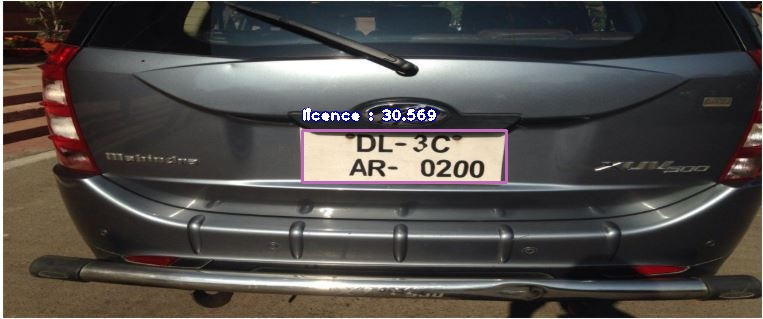

In [0]:
from IPython.display import Image
Image(filename='/content/text_detected_5.jpg')

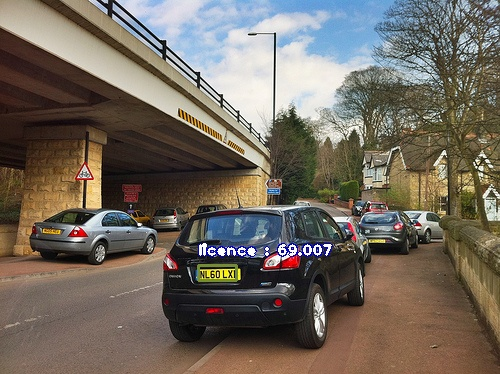

In [0]:
Image(filename='/content/text_detected_3.jpg')

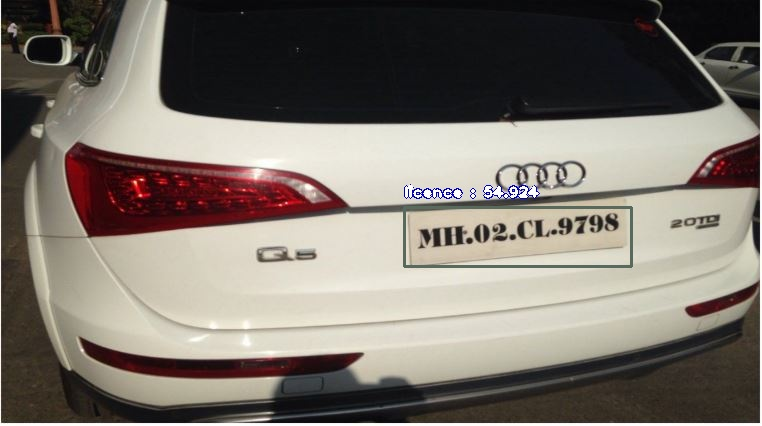

In [0]:
Image(filename='text_detected_4.jpg')

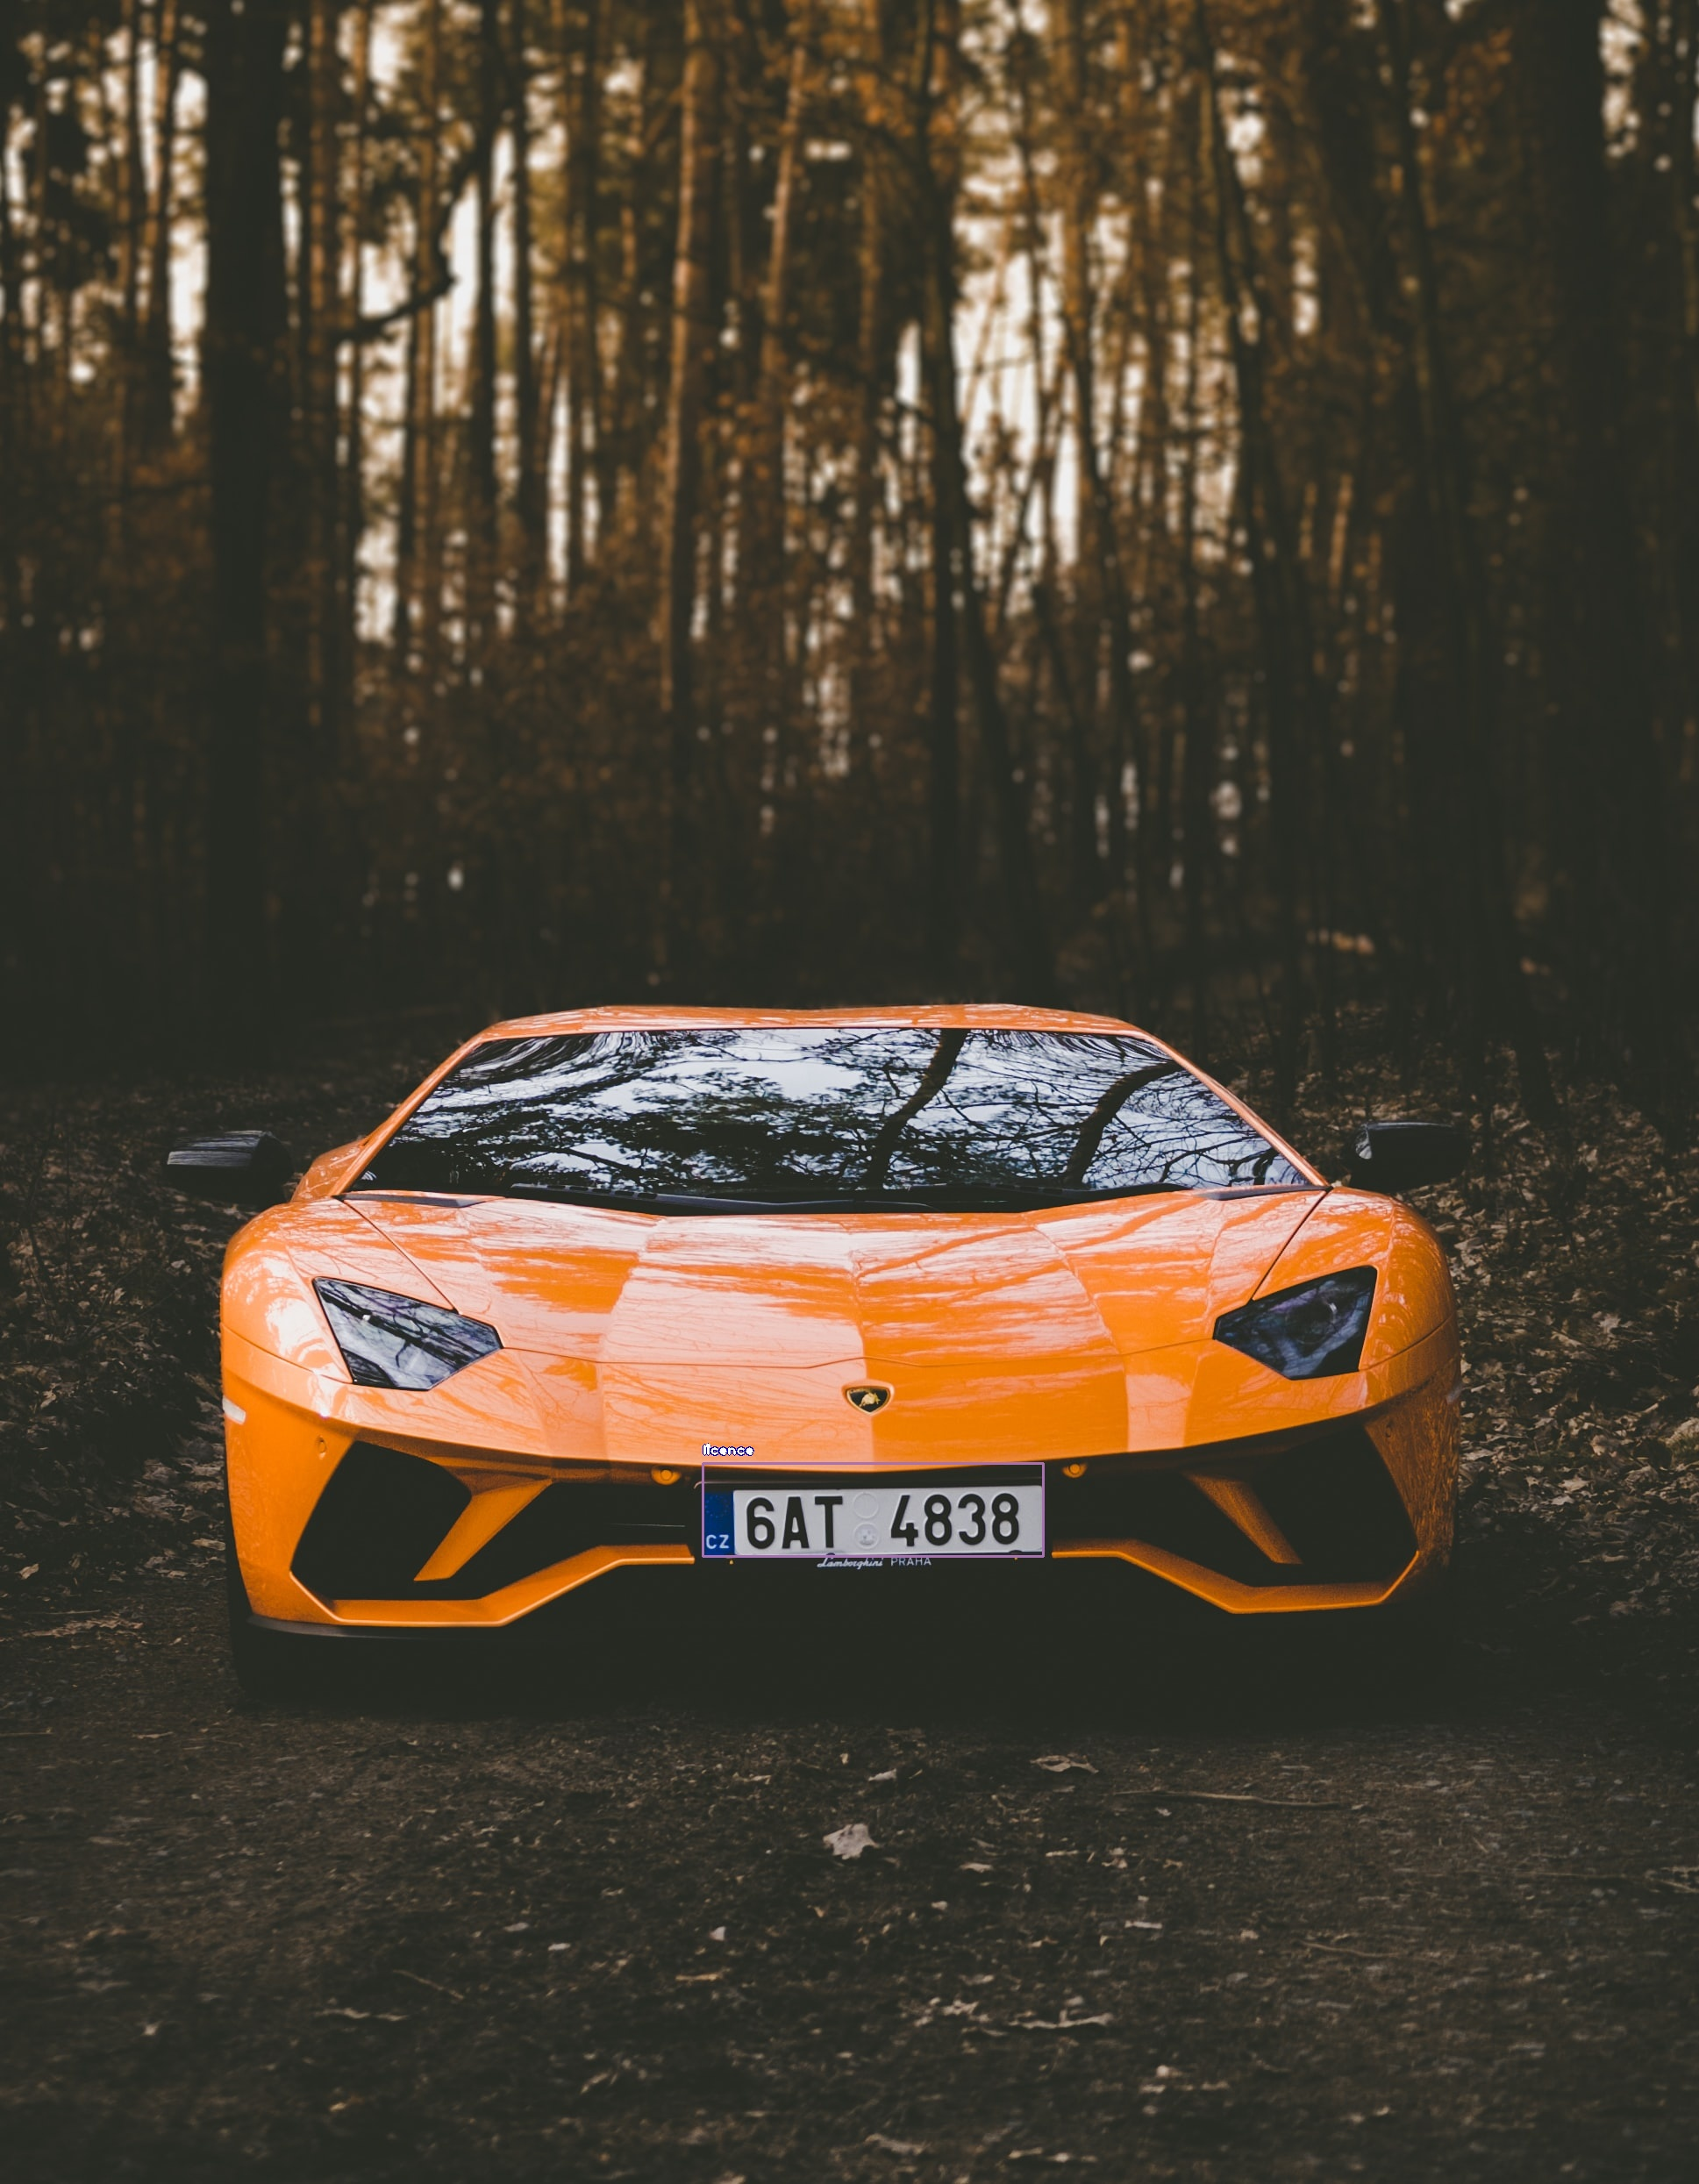

In [0]:
from IPython.display import Image
Image(filename = '/content/text_detected_lambo.jpg')

#**PyTesseract For Generation of Text**

**Installing Pytesseract**

In [5]:
!sudo apt-get update
!sudo apt-get install tesseract-ocr
!sudo apt-get install libtesseract-dev

Get:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic/main amd64 Packages [37.4 kB]
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubu

In [6]:
!pip install tesseract
!pip install tesseract-ocr

     |████████████████████████████████| 45.6MB 71kB/s 
  Created wheel for tesseract: filename=tesseract-0.1.3-cp36-none-any.whl size=45562571 sha256=993f213433eb934735d51e5faeef3468a96bbbb4c40a8f0a027c9f657fb94896
  Stored in directory: /root/.cache/pip/wheels/82/1f/d9/24797b123379e4ea9511cf660835468b62dad609634cad2aba
Successfully built tesseract
  Created wheel for tesseract-ocr: filename=tesseract_ocr-0.0.1-cp36-cp36m-linux_x86_64.whl size=115389 sha256=63c58f3ac7d59429ad911388c25565a698196fe7972f93b33ad55a318394d8c9
  Stored in directory: /root/.cache/pip/wheels/7d/32/ba/e0852fe25fb388c8108871713a344ec638e231d27f53b742db
Successfully built tesseract-ocr


In [7]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.4-py2.py3-none-any.whl size=13431 sha256=bdfce116e2e964c0688583604f0a4126e9bb9804b0f29d02661b75c8d40fe1e0
  Stored in directory: /root/.cache/pip/wheels/63/2a/a0/7596d2e0a73cf0aeffd6f6170862c4e73f3763b7827e48691a
Successfully built pytesseract


#**Important Section**

In [8]:
!pip install deskew

In [10]:
!deskew /content/text_detected_200-objects/licence-00000.jpg

Estimated angle: -88.49162011173185


In [0]:
!deskew --output deskewed_200.jpg /content/text_detected_200-objects/licence-00000.jpg

**1st Approach**

In [0]:
import tempfile

import cv2
import numpy as np
from PIL import Image
import pytesseract

IMAGE_SIZE = 300
BINARY_THREHOLD = 180

def process_image_for_ocr(file_path):
    # TODO : Implement using opencv
    temp_filename = set_image_dpi(file_path)
    im_new = remove_noise_and_smooth(temp_filename)
    return im_new

def set_image_dpi(file_path):
    im = Image.open(file_path)
    length_x, width_y = im.size
    factor = max(1, int(IMAGE_SIZE / length_x))
    size = factor * length_x, factor * width_y
    # size = (1800, 1800)
    im_resized = im.resize(size, Image.ANTIALIAS)
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg')
    temp_filename = temp_file.name
    im_resized.save(temp_filename, dpi=(300, 300))
    return temp_filename

def image_smoothening(img):
    ret1, th1 = cv2.threshold(img, BINARY_THREHOLD, 255, cv2.THRESH_BINARY)
    ret2, th2 = cv2.threshold(th1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    blur = cv2.GaussianBlur(th2, (1, 1), 0)
    ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return th3

def remove_noise_and_smooth(file_name):
    img = cv2.imread(file_name, 0)
    filtered = cv2.adaptiveThreshold(img.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 41,
                                     3)
    kernel = np.ones((1, 1), np.uint8)
    opening = cv2.morphologyEx(filtered, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    img = image_smoothening(img)
    or_image = cv2.bitwise_or(img, closing)
    return or_image

In [16]:
img = process_image_for_ocr('/content/deskewed_200.jpg')
cv2.imwrite('processed_201.jpg', img)
text = pytesseract.image_to_string(Image.open('processed_201.jpg'), config='-c tessedit_char_whitelist=.ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
Image(filename='/content/text_detected_200.jpg')
print(text)

“HR26DK8337|


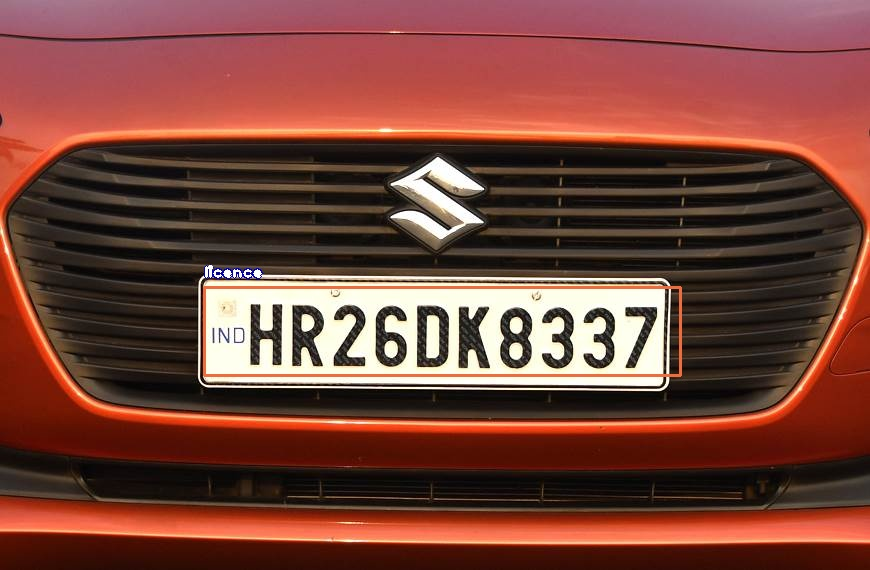

In [17]:
from IPython.display import Image
Image(filename='/content/text_detected_200.jpg')

**2nd Approach**

In [0]:
# import the necessary packages
from PIL import Image
import pytesseract
import argparse
import cv2
import os
# load the example image and convert it to grayscale
image = cv2.imread('/content/deskewed_201.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# check to see if we should apply thresholding to preprocess the
# image
gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# elif args["preprocess"] == "blur":
# 	gray = cv2.medianBlur(gray, 3)
# write the grayscale image to disk as a temporary file so we can
# apply OCR to it
filename = "{}.png".format(os.getpid())
cv2.imwrite(filename, gray)

# load the image as a PIL/Pillow image, apply OCR, and then delete
# the temporary file
text = pytesseract.image_to_string(Image.open(filename), lang = 'eng', config='-c tessedit_char_whitelist=.ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
#os.remove(filename)
print(text)
# show the output images
# cv2.imshow("Image", image)
# cv2.imshow("Output", gray)
# cv2.waitKey(0)

MHI9NCW99

MHI2DE 1433,


**3rd Approach**

In [0]:
img = cv2.imread('/content/deskewed_201.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
text = pytesseract.image_to_string(img)
print(text)

MH12DF 1433
